In [1]:
library("fuzzyforest")
library("WGCNA")
library("randomForest")

Warning message:
"package 'fuzzyforest' was built under R version 3.6.1"Registered S3 methods overwritten by 'ggplot2':
  method         from 
  [.quosures     rlang
  c.quosures     rlang
  print.quosures rlang

Warning message:
"package 'WGCNA' was built under R version 3.6.1"Loading required package: dynamicTreeCut
Loading required package: fastcluster

Attaching package: 'fastcluster'

The following object is masked from 'package:stats':

    hclust


Attaching package: 'WGCNA'

The following object is masked from 'package:stats':

    cor

randomForest 4.6-14
Type rfNews() to see new features/changes/bug fixes.


# No Time Structure

## Data

In [2]:
data_noTime <- read.csv(file="NoTime_noise0.1.csv", header=TRUE, sep=",")
data_noTime[1:5,]

X,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401
1,1.33357701,1.3119130,0.1287490,0.4734708,0.4219088,1.86992267,0.2658068,0.6137465,0.8406168,...,-0.5691202,-1.7972101,-0.116074956,-0.72037243,-0.8775418,-0.5160136,-1.6354432,0.46064277,-1.12069215,15.080493
2,1.22506847,0.6728545,1.3234603,0.9664843,1.8386572,2.58401244,1.9971282,1.8212609,1.2358817,...,-0.2072526,-0.6464699,0.339969320,0.27345104,-0.4410430,0.5996994,0.8039378,-0.37491352,0.06804824,8.691340
3,-1.85387599,-2.3600769,-1.4503713,-1.8443407,-1.4854605,-1.85264522,-1.1109663,-1.5374090,-1.8286555,...,-1.8573773,0.1424888,0.820461282,1.51299453,-1.5844754,1.2149999,0.1104934,-0.16706108,1.81616801,8.067004
4,0.77659158,0.2831775,0.4451618,1.5981691,0.5411189,0.55056867,1.2413425,1.1642259,0.3120390,...,0.6388412,0.9886640,1.105846602,0.65439654,0.2722526,-0.3842706,-0.2089597,0.87187190,0.72522529,10.339589
5,0.05696711,0.1240296,-0.8495131,-0.4234050,-0.1848888,-0.08789926,-0.5471218,0.4001218,-0.4253202,...,0.3595277,-0.4198238,0.005158983,-0.04277947,-1.0695567,1.0678965,1.0370920,0.06407236,-0.37706360,-3.309844


In [3]:
data_noTime = data_noTime[,-1] # delete the X column (name of rows)
cat(dim(data_noTime))
data_noTime[1:5,]

700 401

V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V392,V393,V394,V395,V396,V397,V398,V399,V400,V401
1.33357701,1.3119130,0.1287490,0.4734708,0.4219088,1.86992267,0.2658068,0.6137465,0.8406168,0.4457539,...,-0.5691202,-1.7972101,-0.116074956,-0.72037243,-0.8775418,-0.5160136,-1.6354432,0.46064277,-1.12069215,15.080493
1.22506847,0.6728545,1.3234603,0.9664843,1.8386572,2.58401244,1.9971282,1.8212609,1.2358817,1.4838029,...,-0.2072526,-0.6464699,0.339969320,0.27345104,-0.4410430,0.5996994,0.8039378,-0.37491352,0.06804824,8.691340
-1.85387599,-2.3600769,-1.4503713,-1.8443407,-1.4854605,-1.85264522,-1.1109663,-1.5374090,-1.8286555,-1.7700476,...,-1.8573773,0.1424888,0.820461282,1.51299453,-1.5844754,1.2149999,0.1104934,-0.16706108,1.81616801,8.067004
0.77659158,0.2831775,0.4451618,1.5981691,0.5411189,0.55056867,1.2413425,1.1642259,0.3120390,0.1022286,...,0.6388412,0.9886640,1.105846602,0.65439654,0.2722526,-0.3842706,-0.2089597,0.87187190,0.72522529,10.339589
0.05696711,0.1240296,-0.8495131,-0.4234050,-0.1848888,-0.08789926,-0.5471218,0.4001218,-0.4253202,-0.7709833,...,0.3595277,-0.4198238,0.005158983,-0.04277947,-1.0695567,1.0678965,1.0370920,0.06407236,-0.37706360,-3.309844


In [4]:
X = data_noTime[,-dim(data_noTime)[2]]
y = data_noTime[,dim(data_noTime)[2]]

## Fitting

In [5]:
# params is stored in xxx_control object
# power: belta
WGCNA_params = WGCNA_control(power=3,TOMType="unsigned",minModuleSize=30,
                            numericLabels=TRUE,pamRespectsDendro=FALSE)

mtry_factor     = 1 # mtry = sqrt(p)*mtry_factor; mtry is the num in subspace method
drop_fraction   = 0.25 # drop xxx in each iteration of RFE-RF
number_selected = 8 # we want 10 out of all features
keep_fraction   = 0.05 # keep xxx for each module
min_ntree        = 500 # used for calculating ntree
ntree_factor    = 5 # used for calculating ntree
final_ntree     = 500 # RF in selecting step

screen_params = screen_control(drop_fraction = drop_fraction,
                              keep_fraction  = keep_fraction,
                              min_ntree      = min_ntree,
                              mtry_factor    = mtry_factor,
                              ntree_factor   = ntree_factor)

select_params = select_control(drop_fraction  = drop_fraction,
                              number_selected = number_selected,
                              min_ntree       = min_ntree,
                              mtry_factor     = mtry_factor,
                              ntree_factor    = ntree_factor)                              

In [6]:
# a "fuzzy_forest" object
wff_fit = wff(X,y,WGCNA_params = WGCNA_params,
             screen_params = screen_params,
             select_params = select_params,
             final_ntree = final_ntree)

In [7]:
print(wff_fit)

  feature_name variable_importance module_membership
1           V1            46.61354                 1
3           V3            40.38105                 1
6         V301            37.71717                 0
2           V2            23.92534                 1
5          V93            11.41860                 1
7         V302            11.15178                 0
4          V28            10.57280                 1
8         V303             8.77639                 0


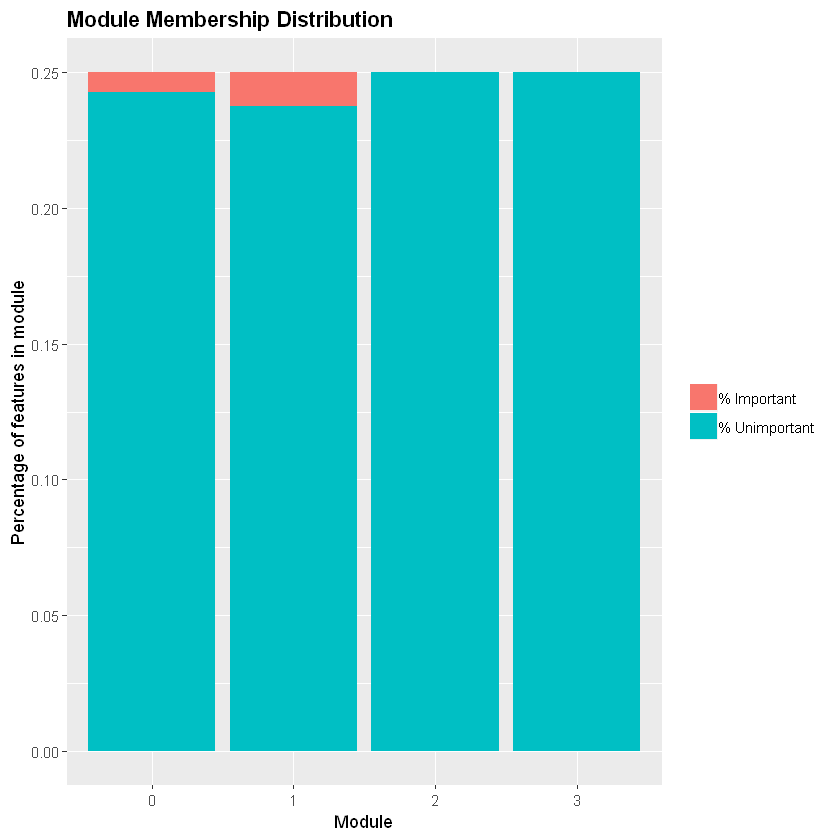

In [8]:
modplot(wff_fit)

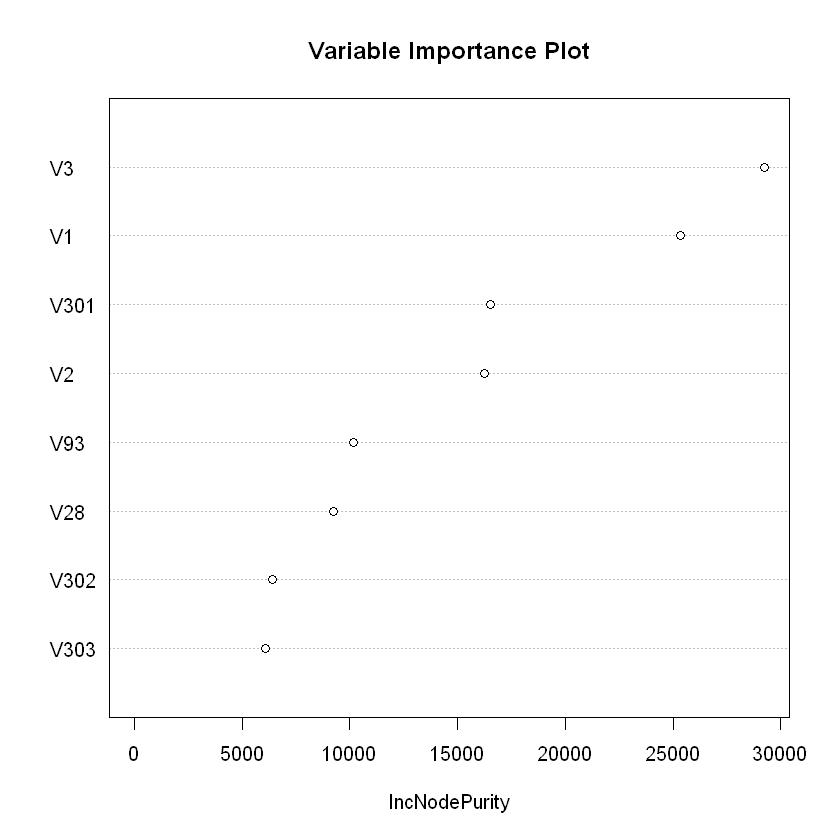

In [9]:
varImpPlot(wff_fit$final_rf,type=2,main="Variable Importance Plot")

Result: Select 3,1,2,301,36,28,302,303
That means still some problems with independent features.

# AR Structure`

In [10]:
data_CS <- read.csv(file="CS_noise0.1.csv", header=TRUE, sep=",")
data_CS = data_CS[,-1] # delete the X column (name of rows)
X = data_CS[,-dim(data_CS)[2]]
y = data_CS[,dim(data_CS)[2]]

In [11]:
# a "fuzzy_forest" object
wff_fit = wff(X,y,WGCNA_params = WGCNA_params,
             screen_params = screen_params,
             select_params = select_params,
             final_ntree = final_ntree)
print(wff_fit)

  feature_name variable_importance module_membership
6         V301           42.152001                 0
2           V2           39.192964                 3
1           V1           25.480629                 3
3           V3           23.713454                 3
5          V78           17.958989                 3
4          V70           12.644140                 3
7         V302            9.835307                 0
8         V303            6.288586                 0


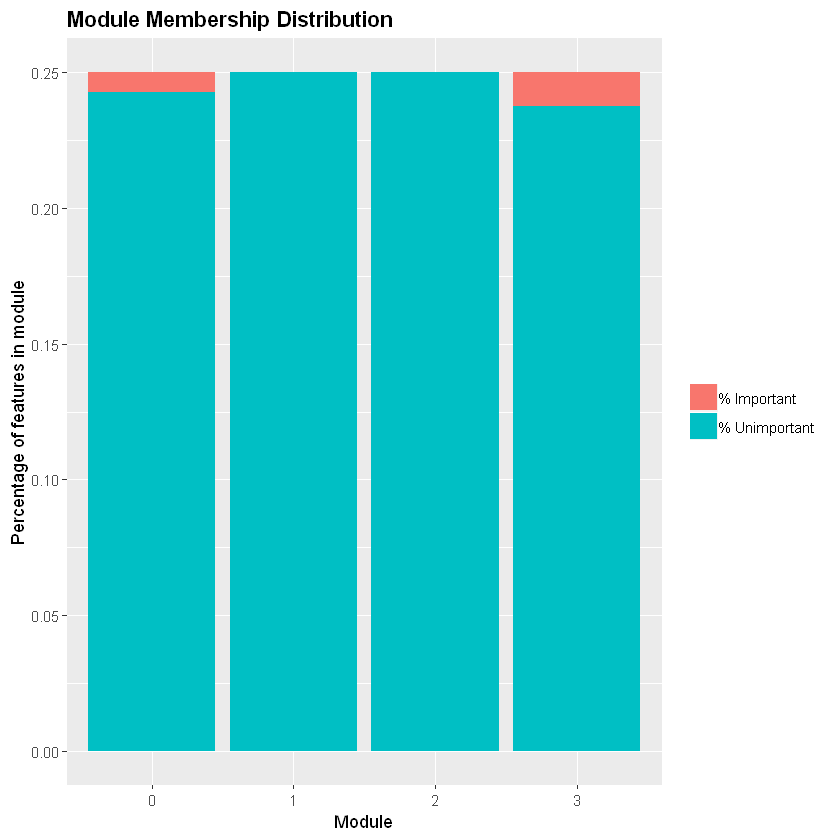

In [12]:
modplot(wff_fit)

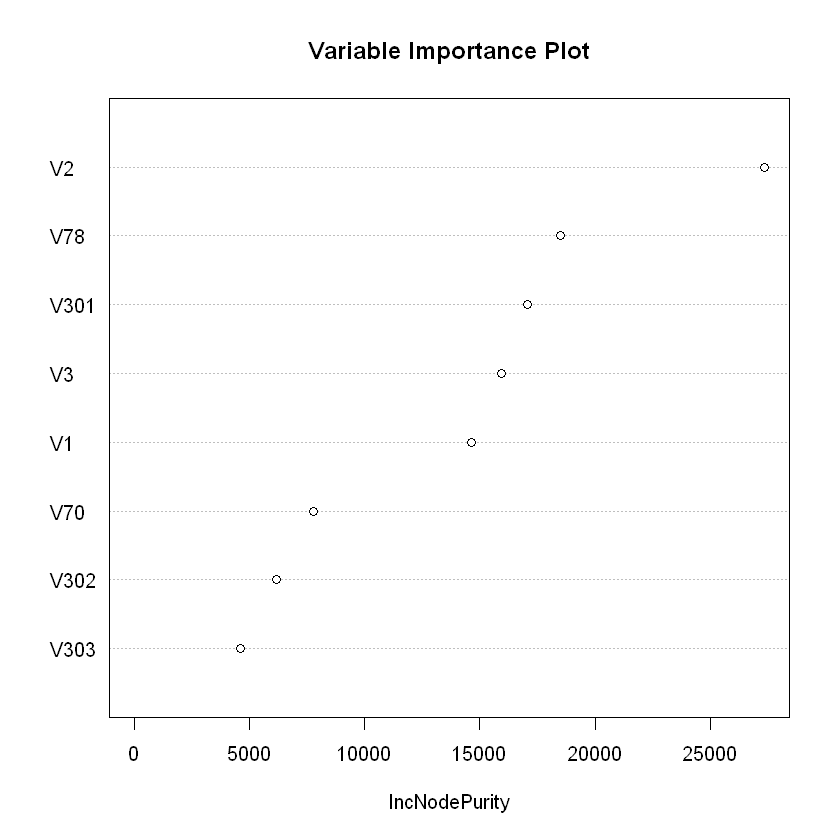

In [13]:
varImpPlot(wff_fit$final_rf,type=2,main="Variable Importance Plot")